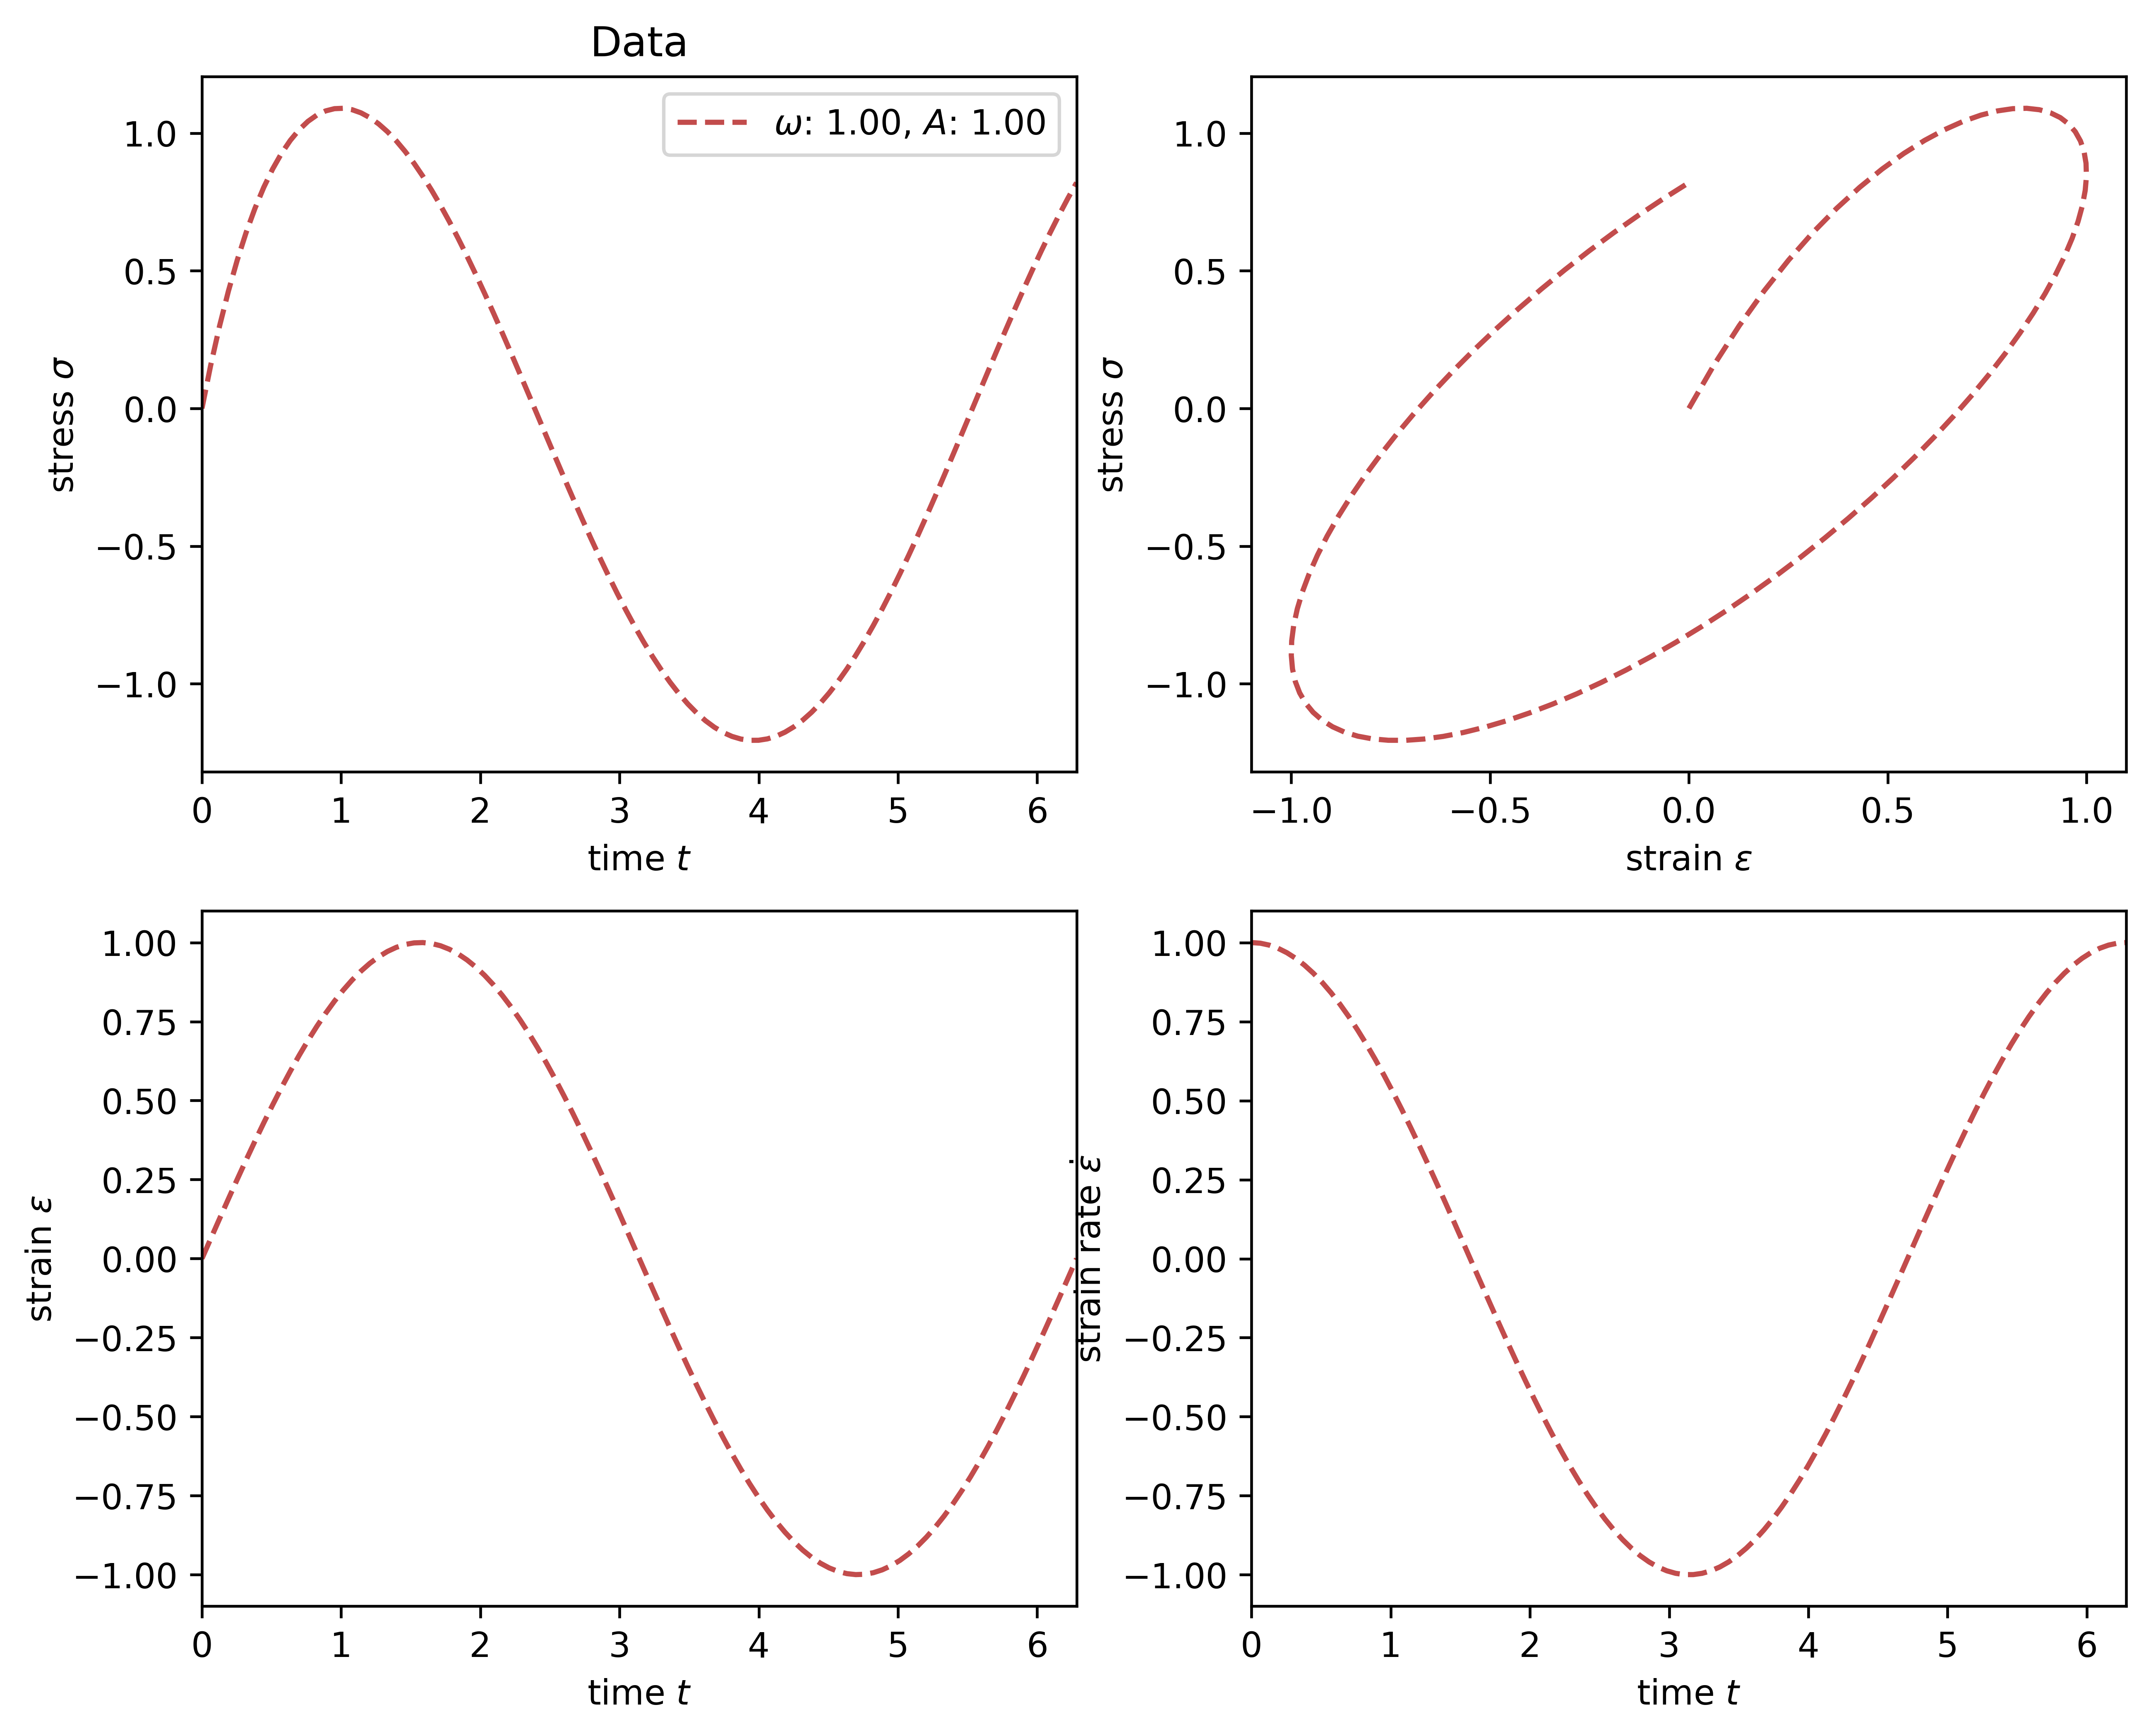

2025-01-20 17:42:21.601924
Epoch 1/100
1/1 - 1s - loss: 1.9565 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1.7893 - 14ms/epoch - 14ms/step
Epoch 3/100
1/1 - 0s - loss: 1.6307 - 11ms/epoch - 11ms/step
Epoch 4/100
1/1 - 0s - loss: 1.4813 - 12ms/epoch - 12ms/step
Epoch 5/100
1/1 - 0s - loss: 1.3414 - 13ms/epoch - 13ms/step
Epoch 6/100
1/1 - 0s - loss: 1.2115 - 11ms/epoch - 11ms/step
Epoch 7/100
1/1 - 0s - loss: 1.0919 - 16ms/epoch - 16ms/step
Epoch 8/100
1/1 - 0s - loss: 0.9830 - 13ms/epoch - 13ms/step
Epoch 9/100
1/1 - 0s - loss: 0.8850 - 12ms/epoch - 12ms/step
Epoch 10/100
1/1 - 0s - loss: 0.7981 - 13ms/epoch - 13ms/step
Epoch 11/100
1/1 - 0s - loss: 0.7223 - 9ms/epoch - 9ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6576 - 12ms/epoch - 12ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6039 - 14ms/epoch - 14ms/step
Epoch 14/100
1/1 - 0s - loss: 0.5607 - 13ms/epoch - 13ms/step
Epoch 15/100
1/1 - 0s - loss: 0.5276 - 13ms/epoch - 13ms/step
Epoch 16/100
1/1 - 0s - loss: 0.5038 - 15ms/epoch - 15ms/s

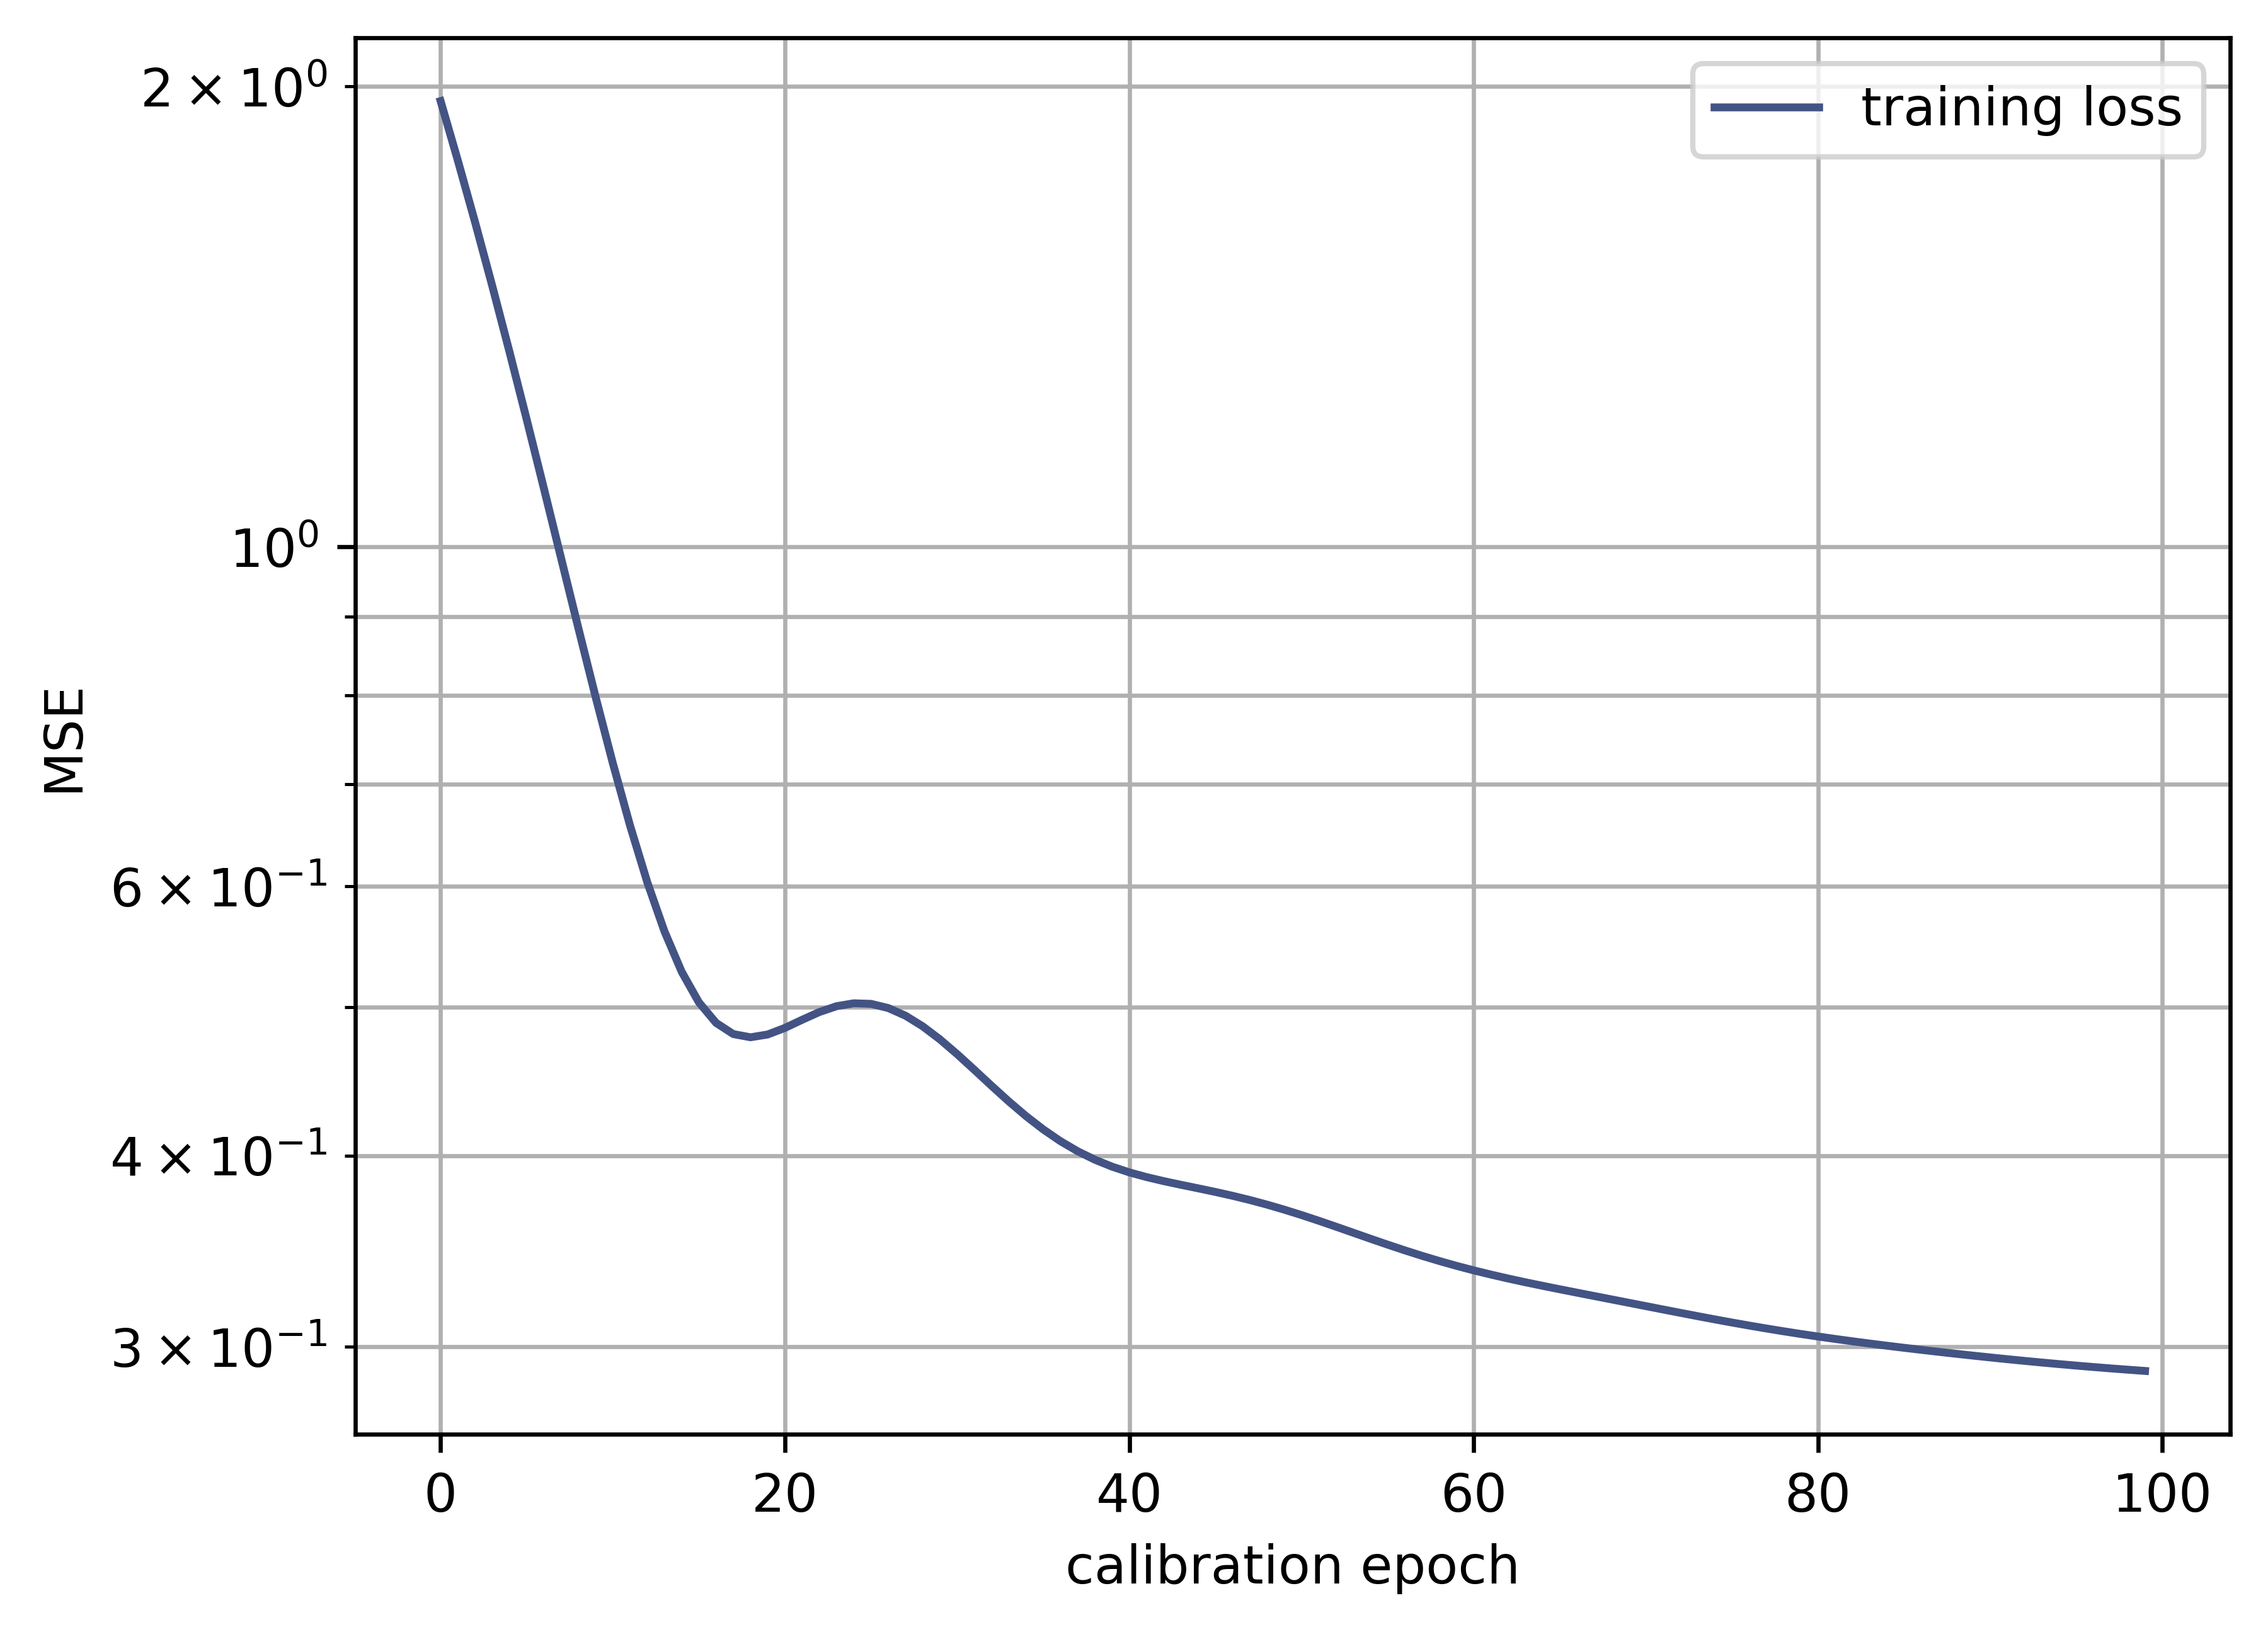

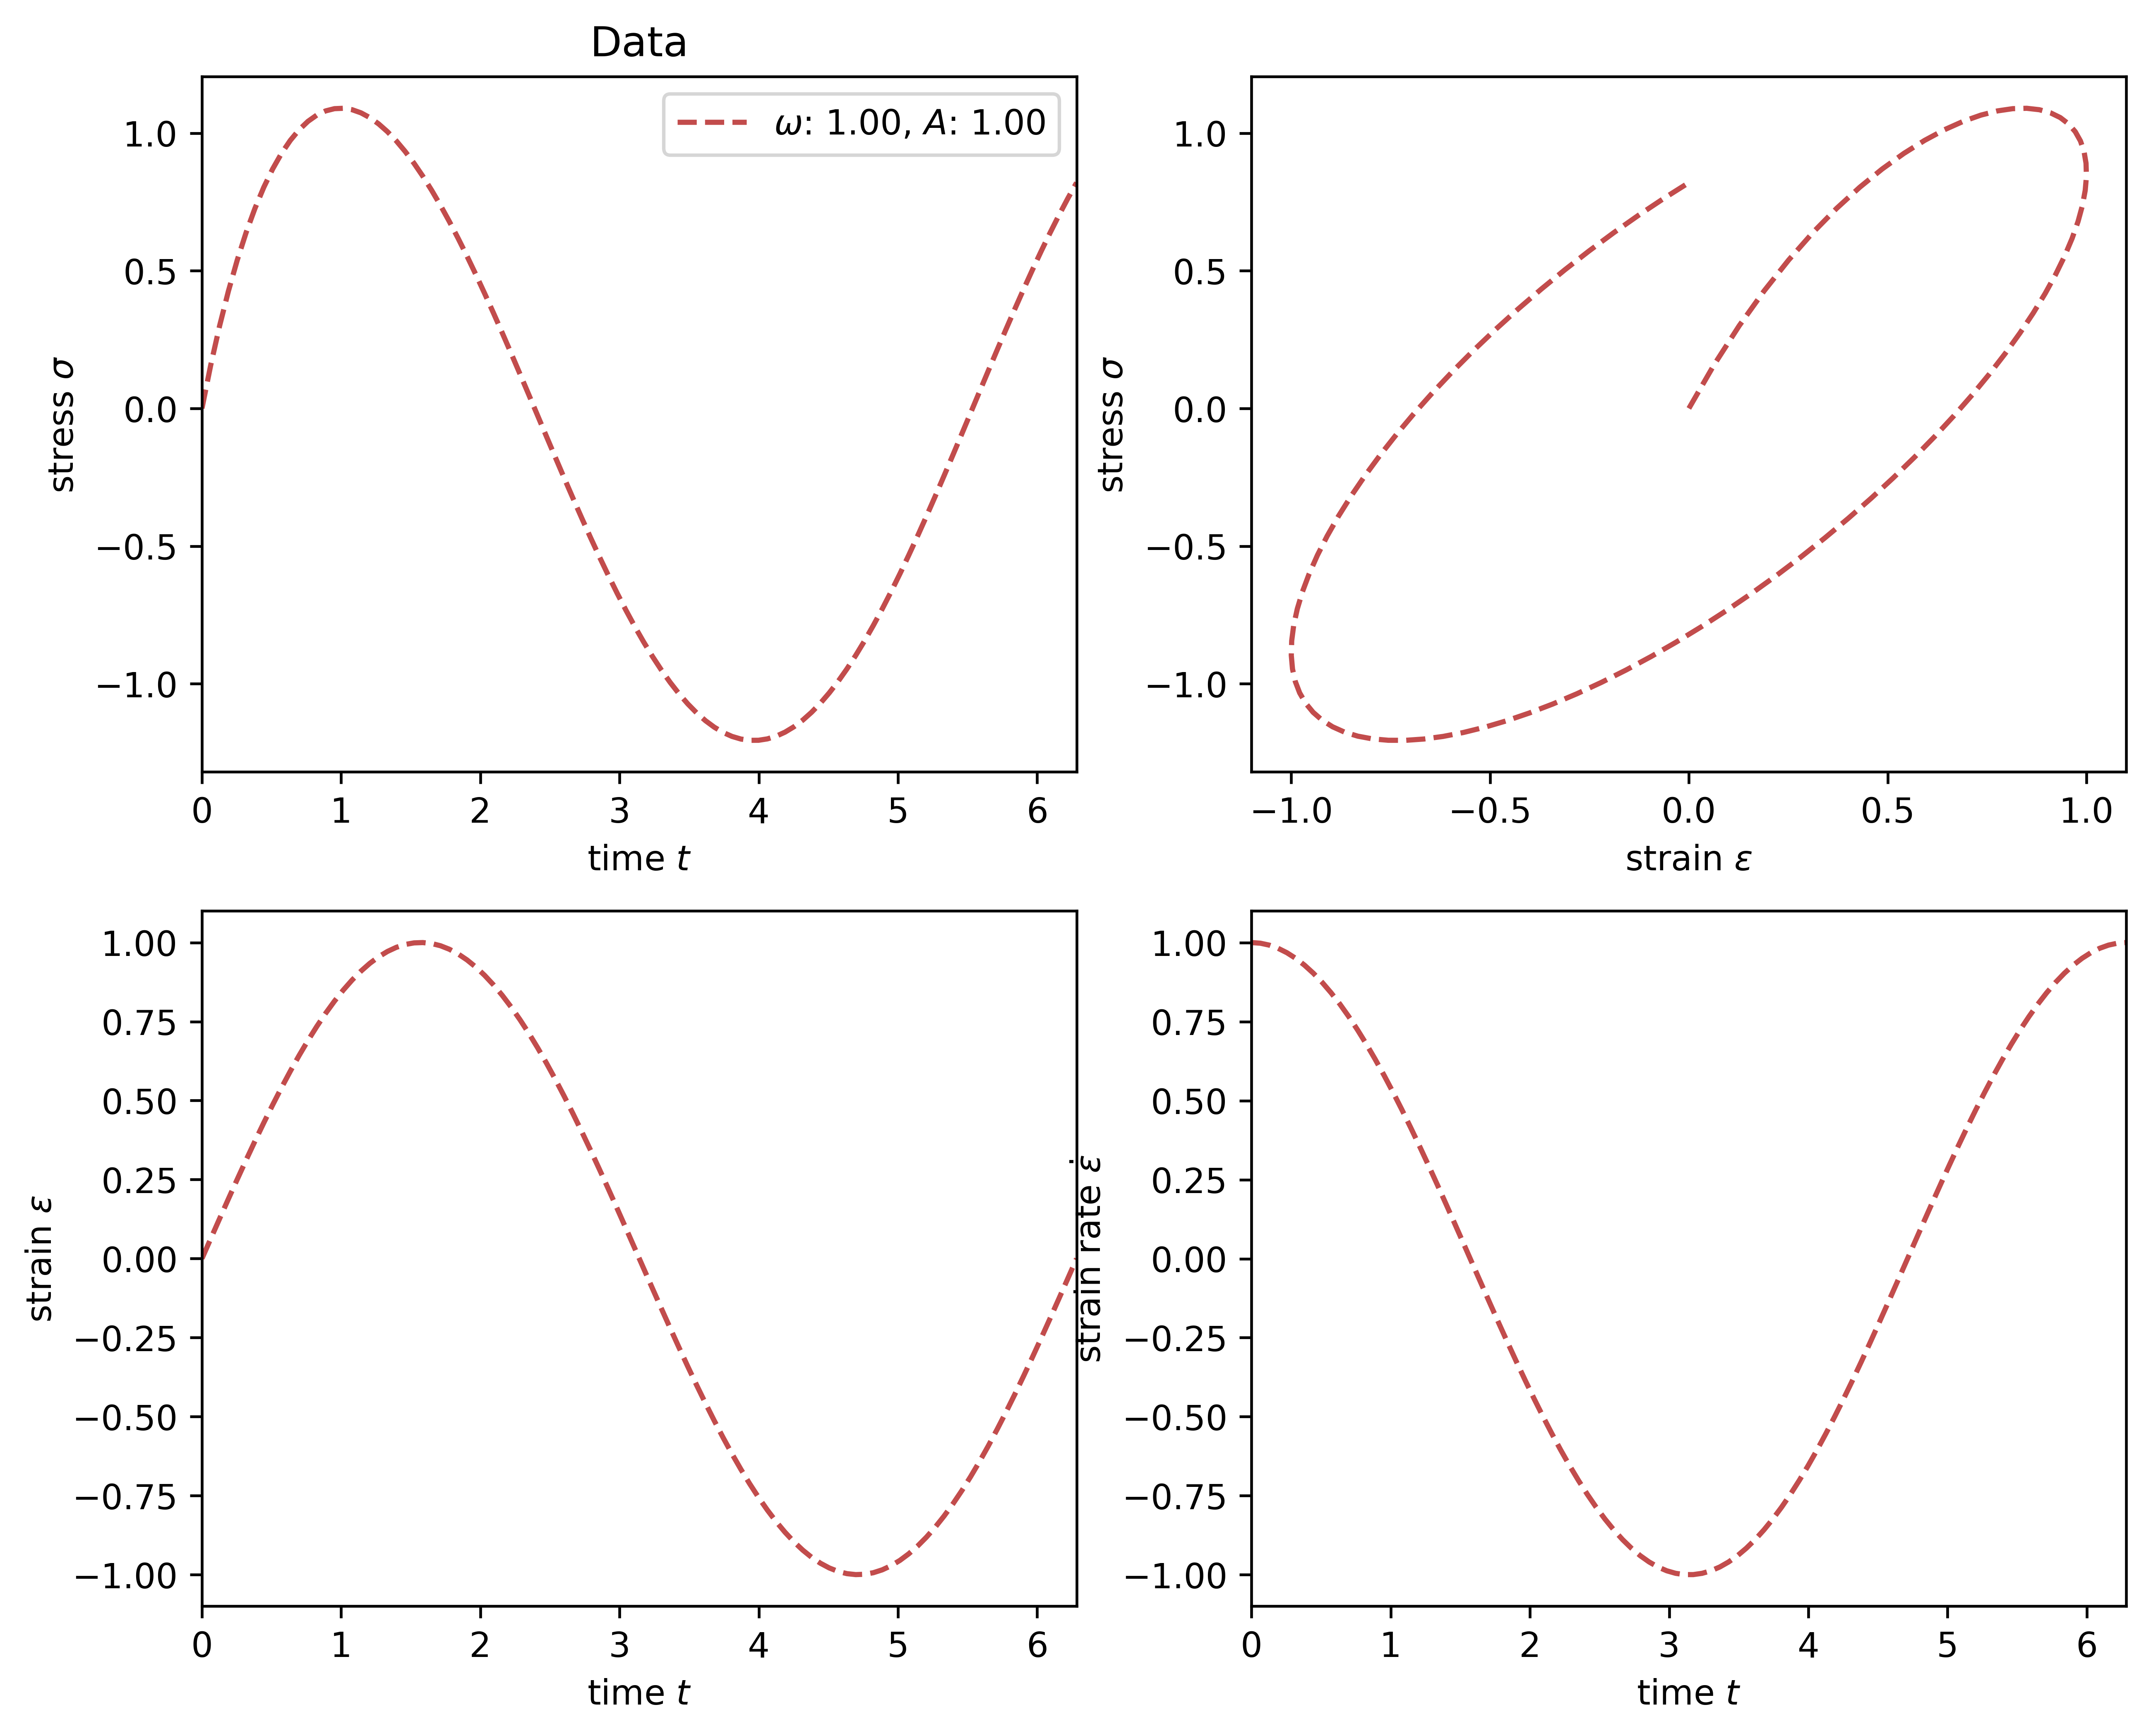

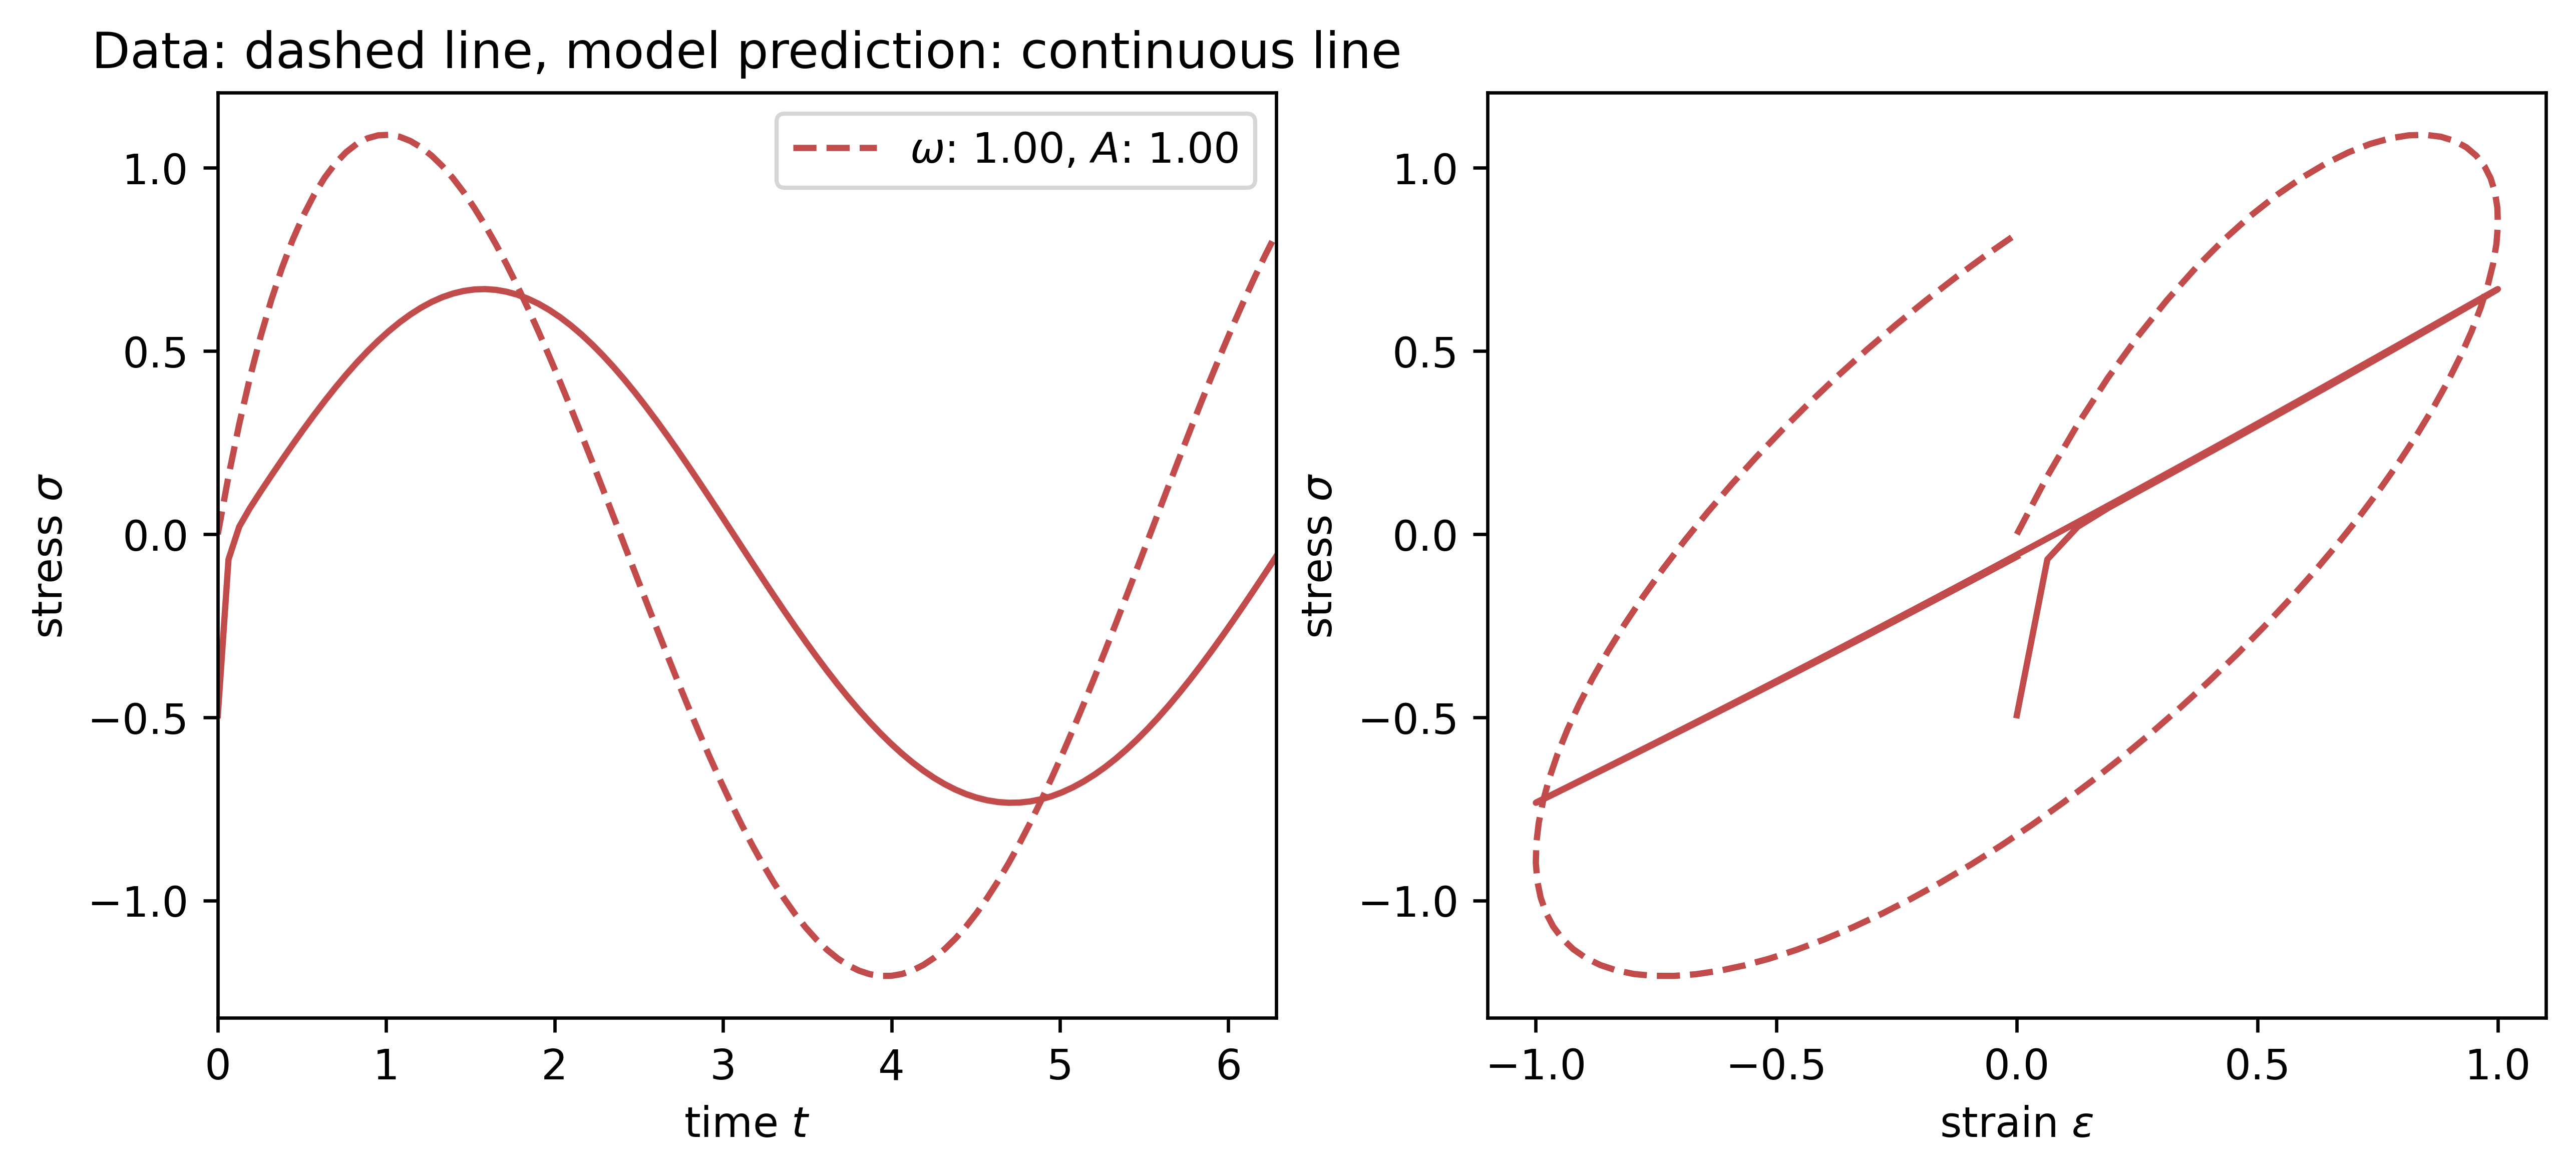

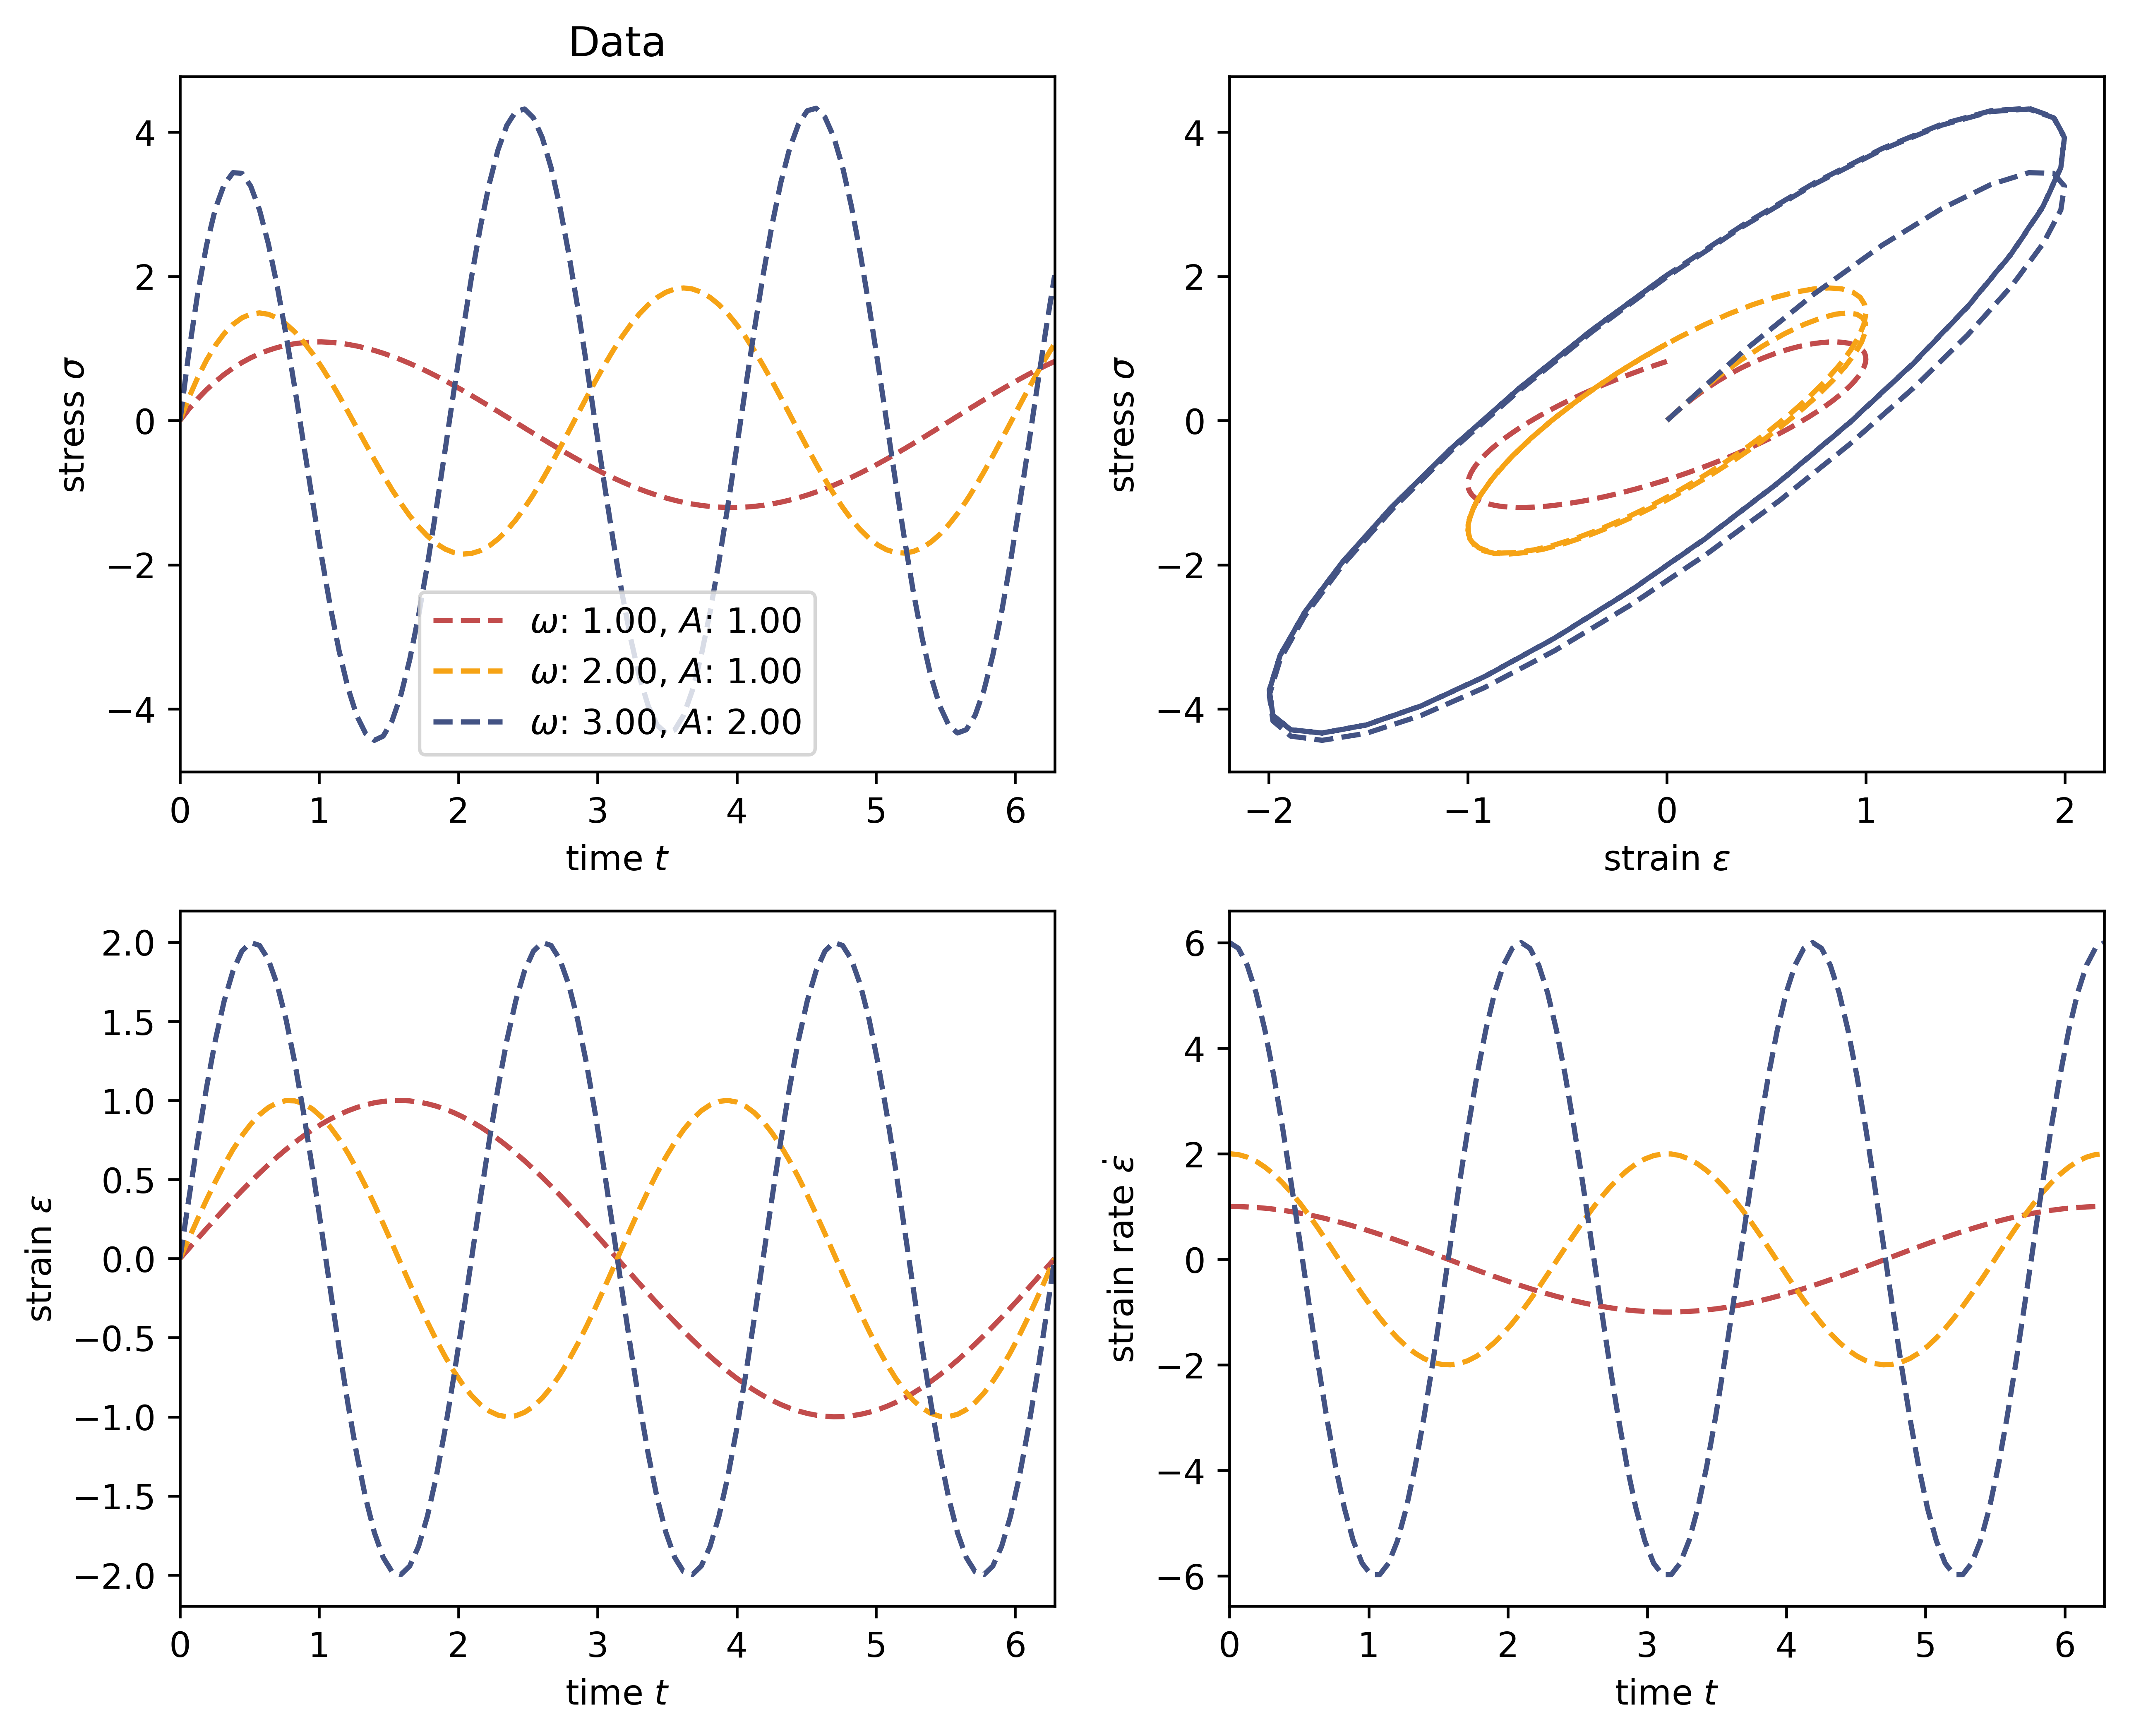

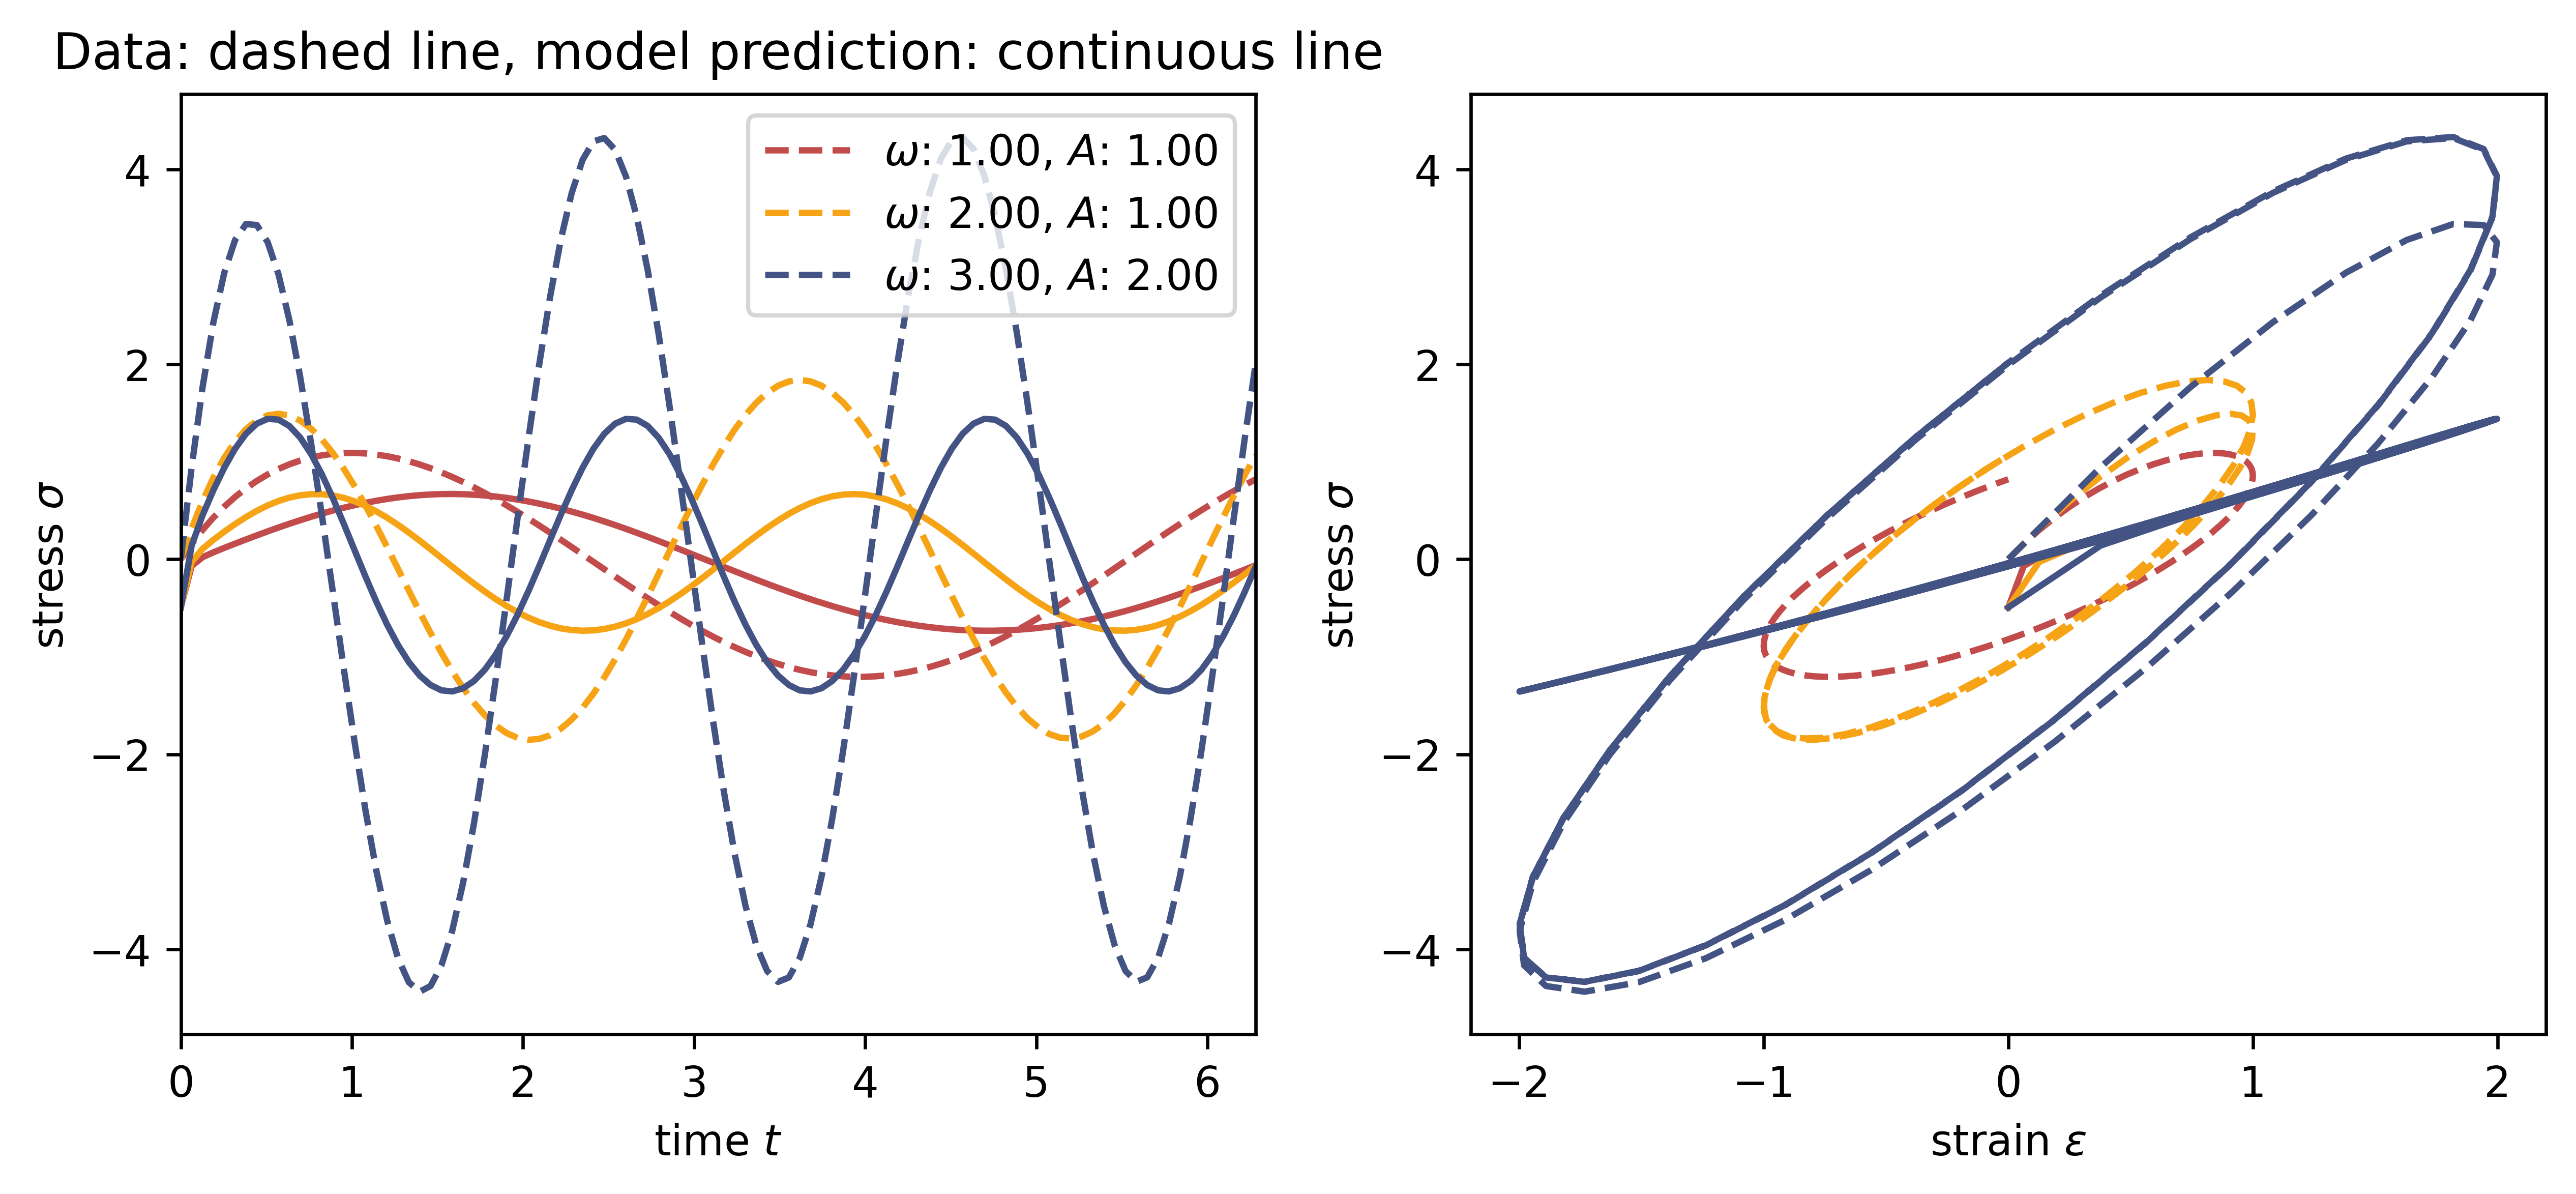

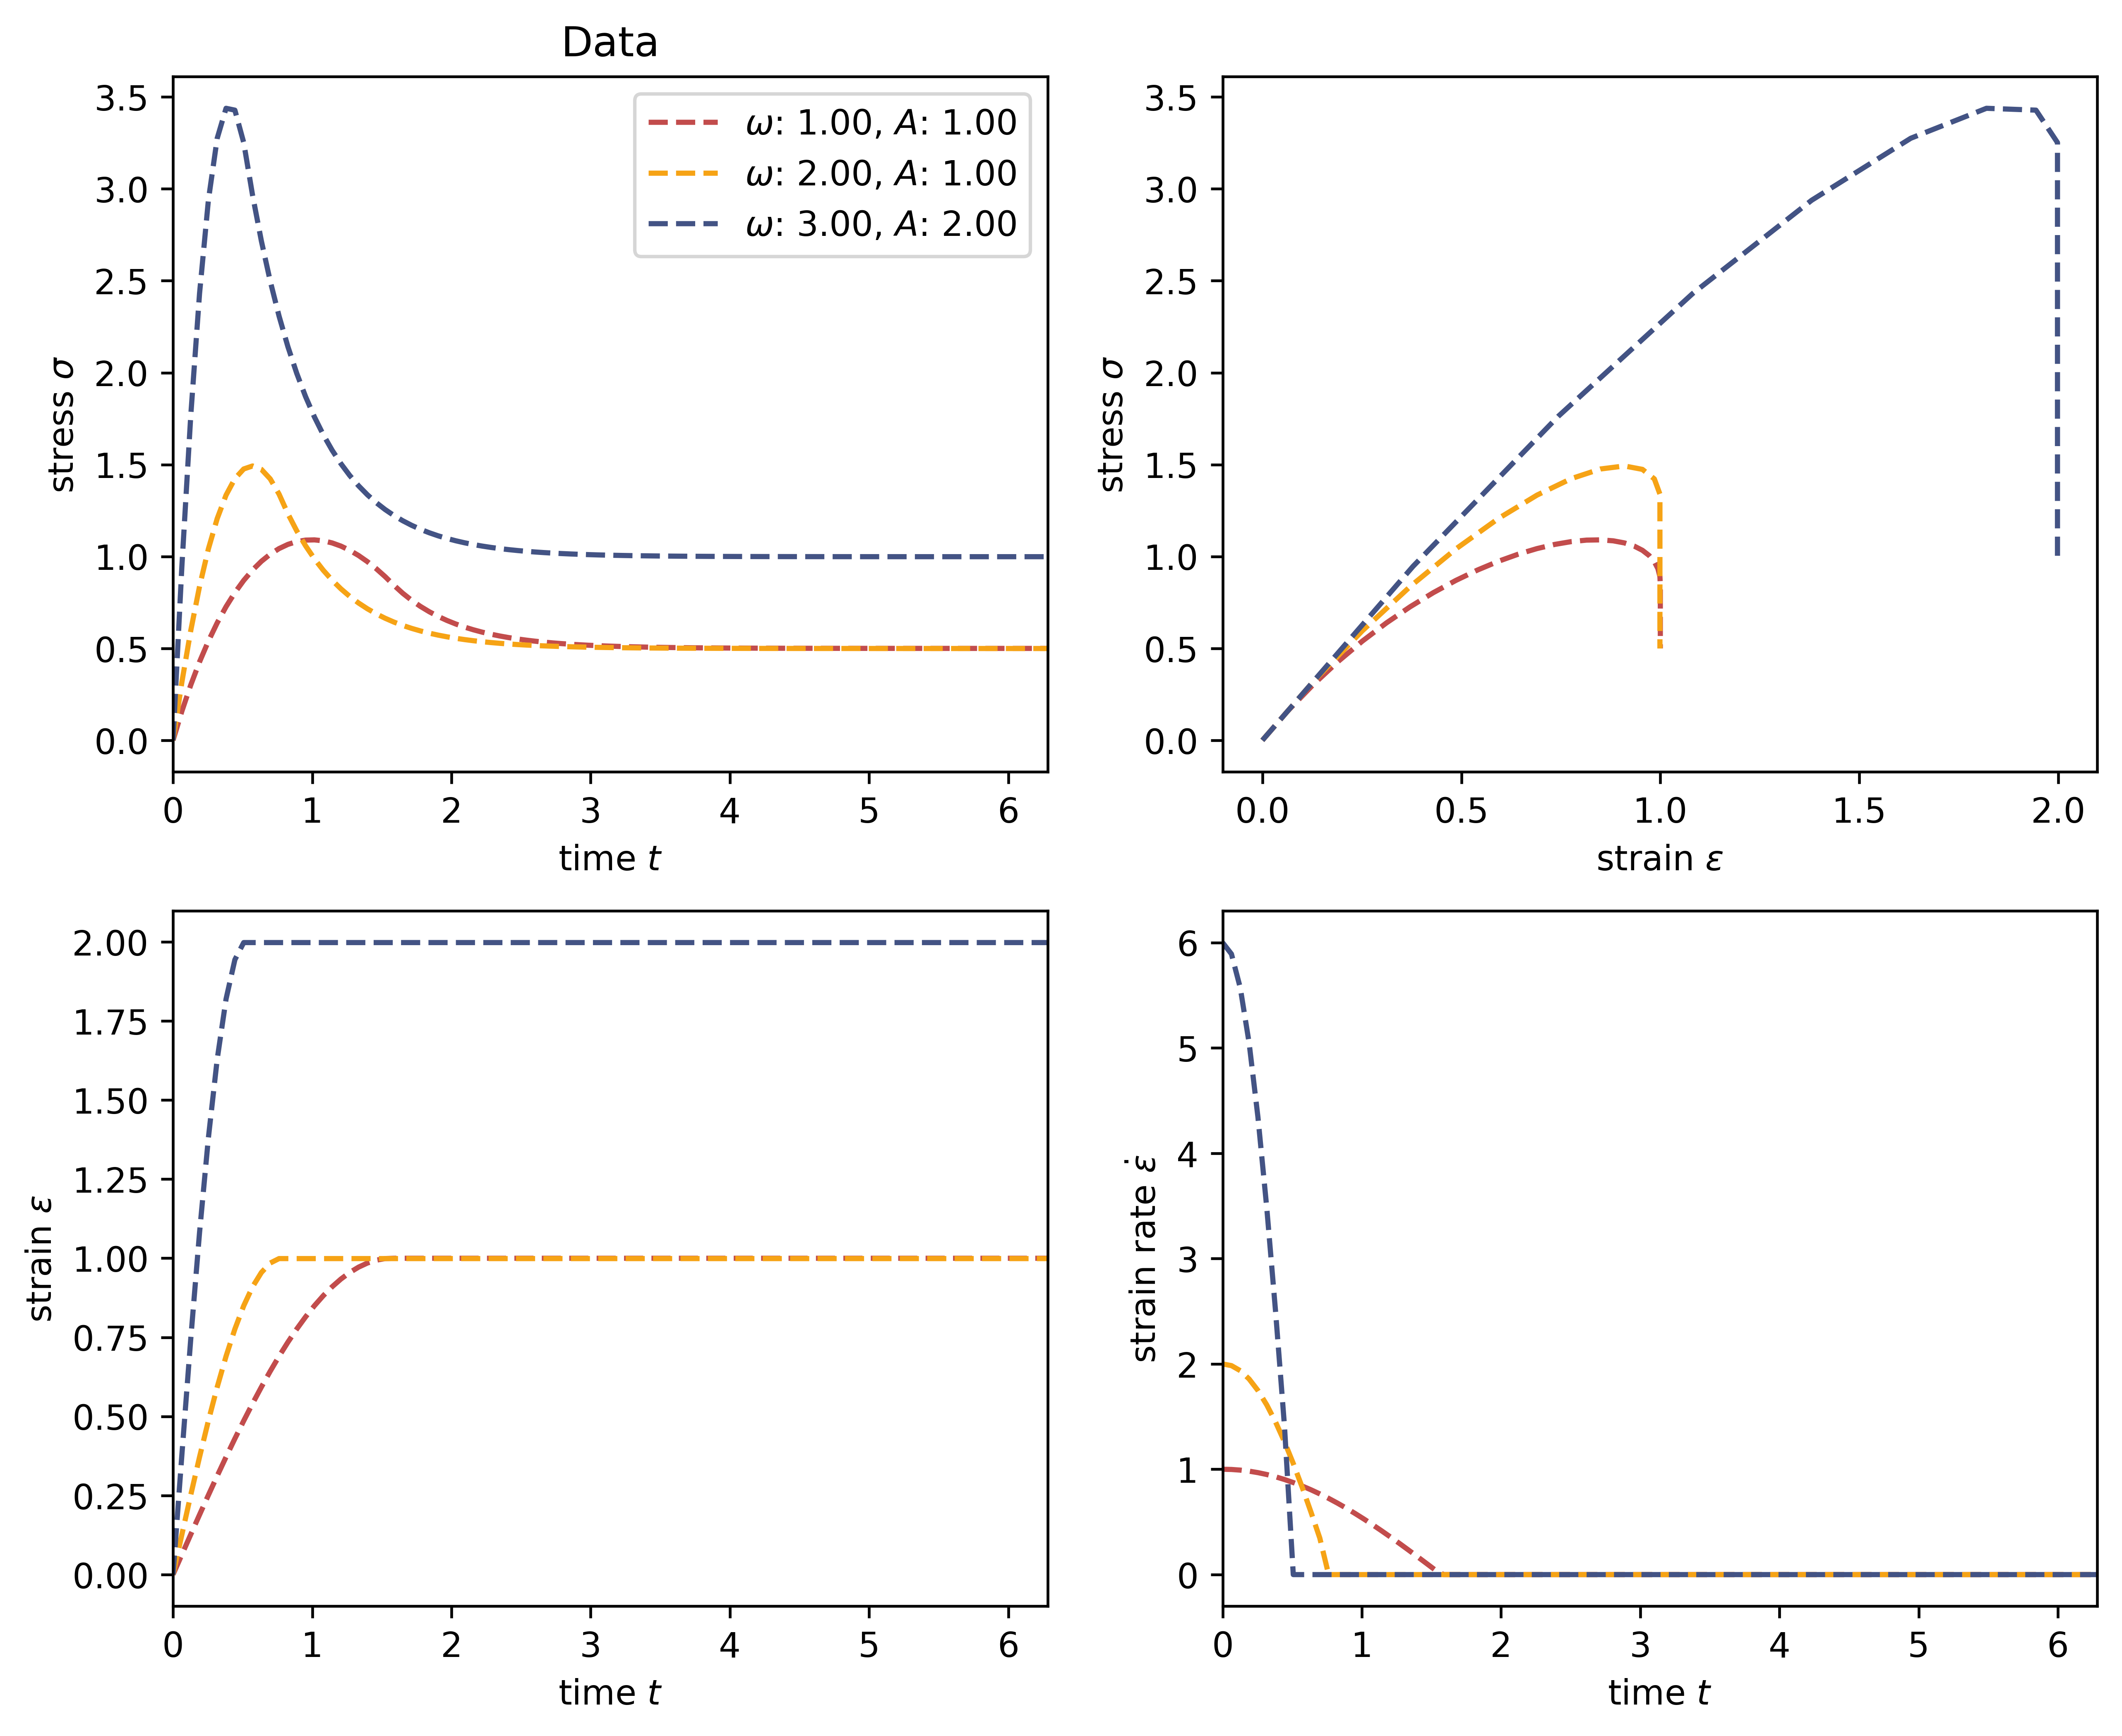

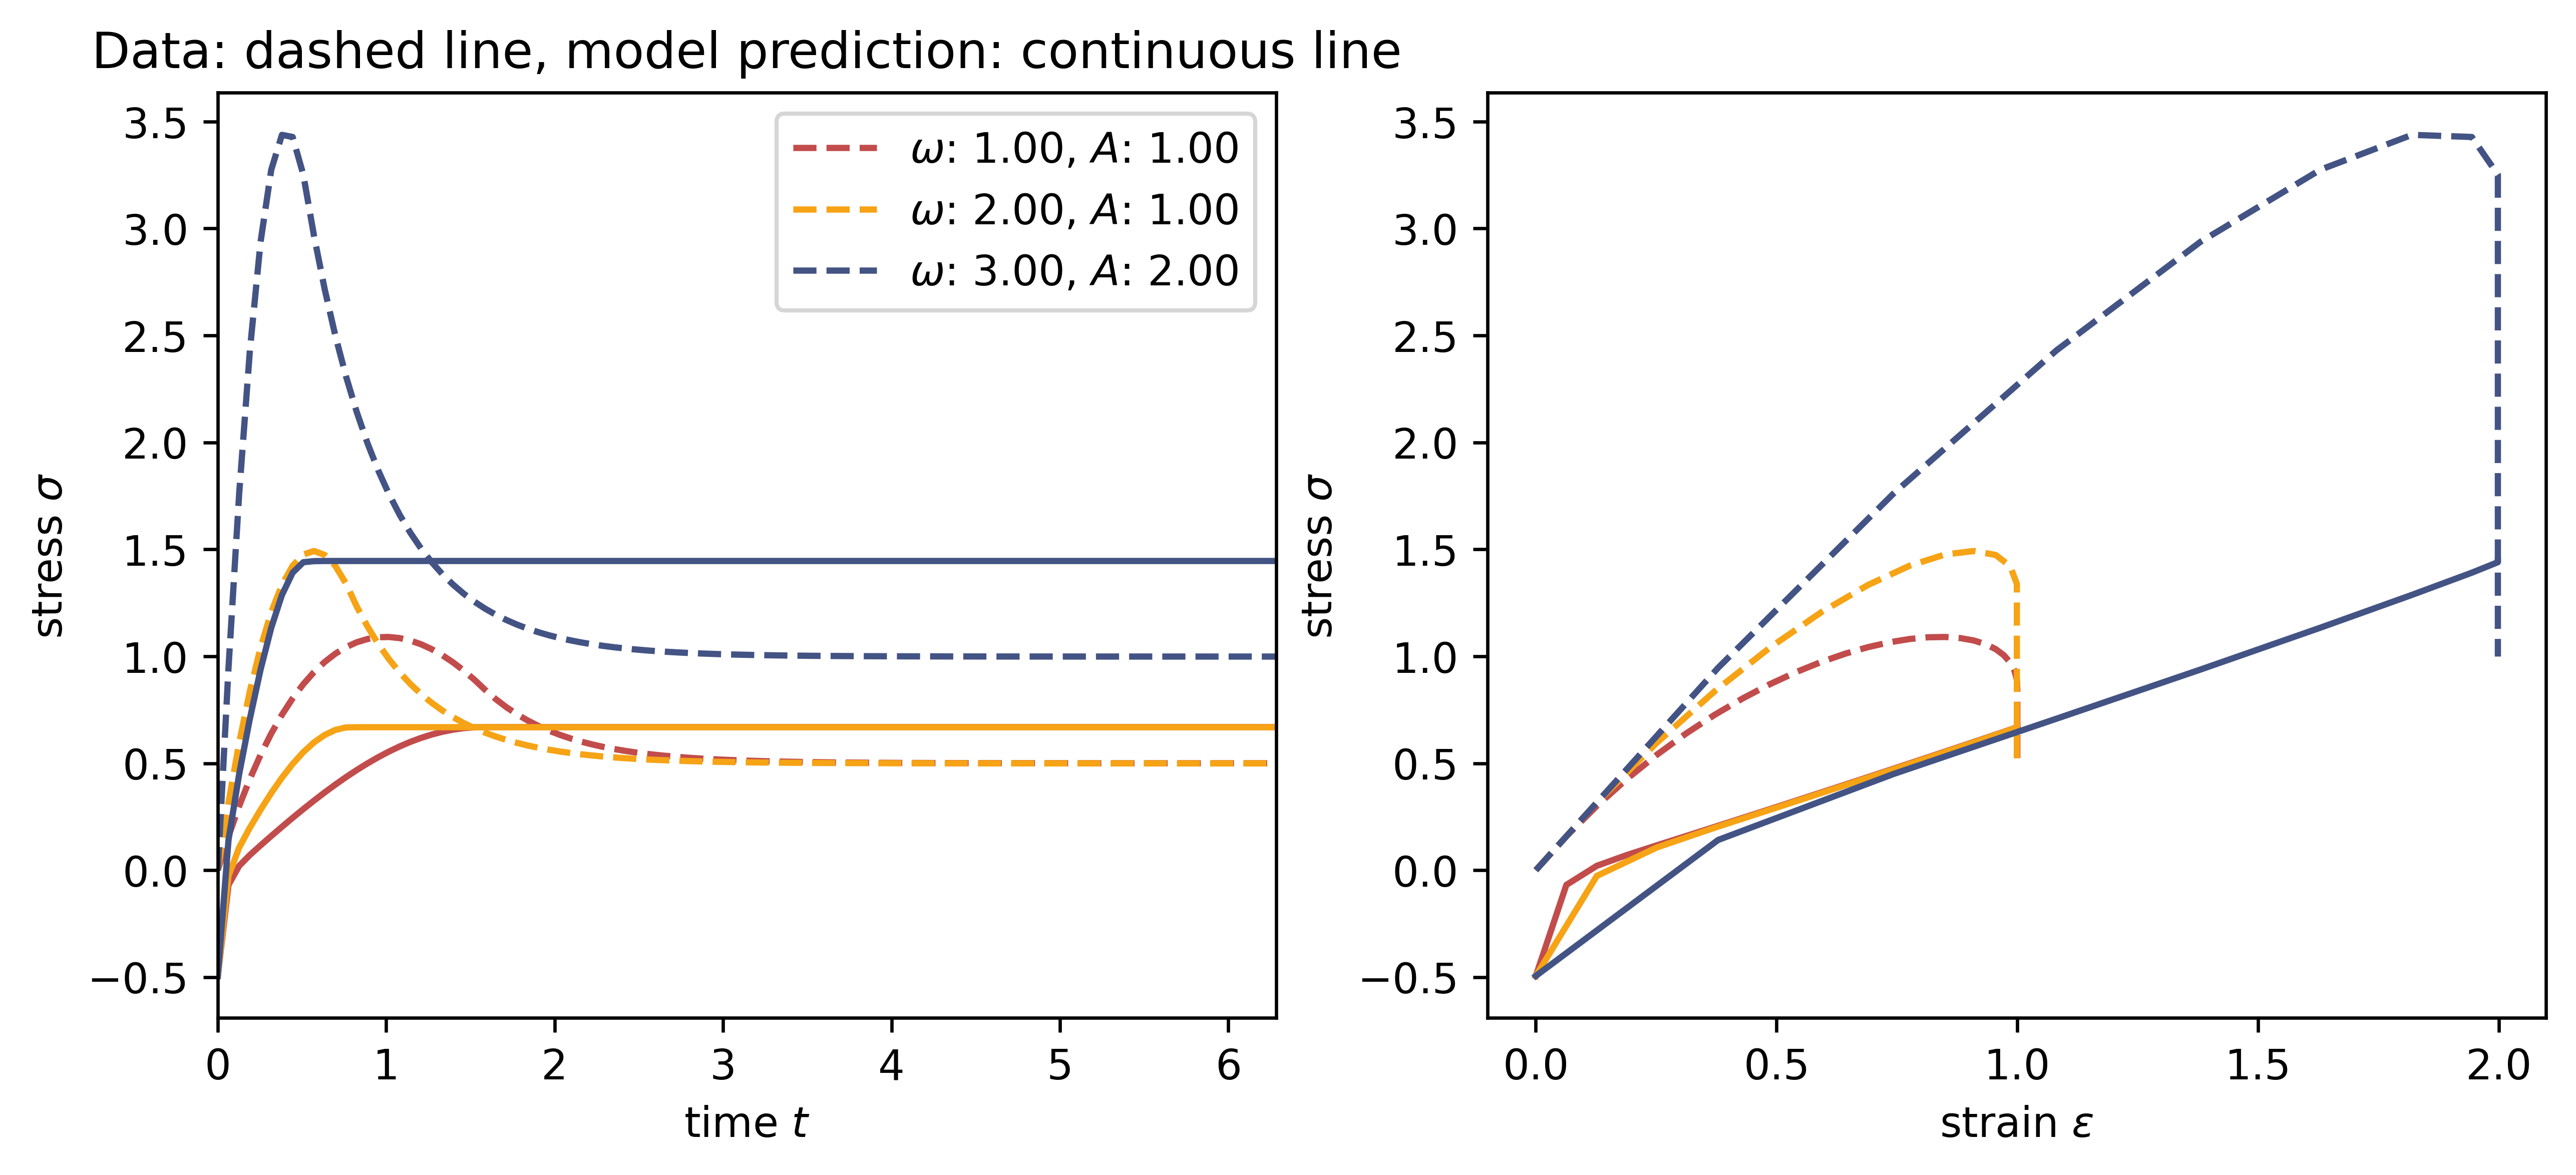

In [1]:
"""
Tutorial Machine Learning in Solid Mechanics (WiSe 23/24)
Task 4: Viscoelasticity
==================
Authors: Dominik K. Klein
         
01/2024
"""


# %%   
"""
Import modules

"""
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
import data as ld
import plots as lp
import core_naive_RNN as hc


# %%   
"""
Load and visualize data

"""


E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

lp.plot_data(eps, eps_dot, sig, omegas, As)



# %%   
"""
Load and evaluate model

"""

model = hc.main()


t1 = now()
print(t1)

tf.keras.backend.set_value(model.optimizer.learning_rate, 0.002)
h = model.fit([eps, dts], [sig], epochs = 100,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')


plt.figure(1, dpi=600)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()



eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)

As = [1,1,2]
omegas = [1,2,3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)


eps, eps_dot, sig, dts = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)
